In [104]:
## Importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [119]:
## Importing the dataset

echrun_file = "https://raw.githubusercontent.com/aj-amitjain/Data_Science/master/dataset/employee_churn_data.csv"
echrun = pd.read_csv(echrun_file)
echrun.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [120]:
## Checking out the shape and frequency of data
#echrun.shape         # Shape : (14999, 9)
#echrun.describe() 

## Checking out the types of variables
echrun.dtypes        # Two catergorical Variables other are of int64 type 

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [121]:
## Checking for any missing value
echrun.isnull().any(axis=0)

employee_id              False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [122]:
## Creating a index of categorical variable
categorical_variables =  echrun.select_dtypes(exclude=['int64']).columns
categorical_variables

Index(['department', 'salary'], dtype='object')

In [123]:
echrun.shape

(14999, 9)

In [124]:
## Importing another dataset 'Employee Satisfaction Evaluation'
ese_file = 'https://raw.githubusercontent.com/aj-amitjain/Data_Science/master/dataset/employee_satisfaction_evaluation.xlsx'
ese  = pd.read_excel(ese_file)
ese.head()


,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [125]:
ese.shape

(14999, 3)

In [223]:
## Merging Employee Churn dataset  with Employee Satisfaction Evaluation dataset
## Matching the index for both dataset
ese = ese.rename(columns= {'EMPLOYEE #' : 'employee_id'})
df = pd.merge(echrun, ese, on='employee_id')
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [224]:
## Verify the shape of new dataset
df.shape

(14999, 11)

In [225]:
df = df.drop(columns=['employee_id'])
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [226]:
## Checking if there is any column with NA 
df.isnull().any(axis=0)

number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
satisfaction_level        True
last_evaluation           True
dtype: bool

In [227]:
## Replacing NA's with mean values
df.fillna(df.mean(), inplace=True)

## Verifying if there is any column with NA 
df.isnull().any(axis=0)

number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
satisfaction_level       False
last_evaluation          False
dtype: bool

No handles with labels found to put in legend.


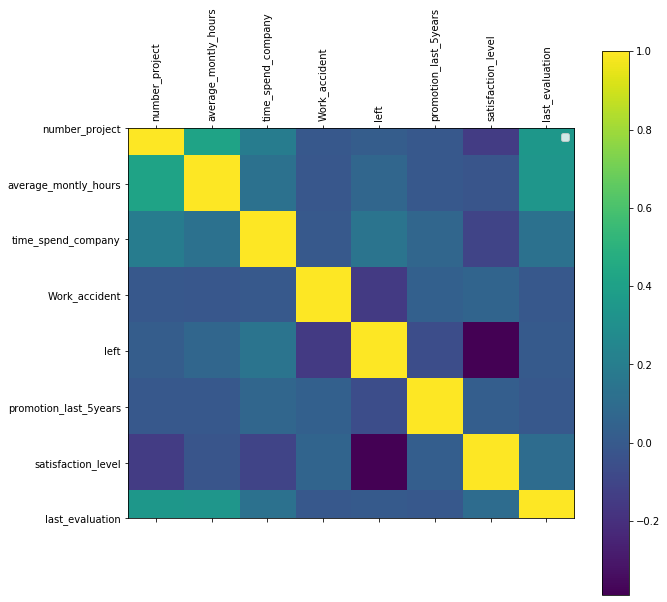

In [228]:
## Correlation between the variables

def correlation_plot(df, size=10):
    corr = df.corr()
    x = y = size
    fig, axis = plt.subplots(figsize=(x,y))
    axis.legend()
    cax = axis.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
correlation_plot(df)

#### Observation from above plot
1. There is a storng negative correlation between satisfication level and employee who left which is very obvious. Similar is the case with work accident. 
2. Number of project also have an impact on satisfication level of the employee.
3. More the employee spend time (year) in a company they tends to be less satisfied.
4. If employee is not promoted in last 5 year they tends to leave the company.

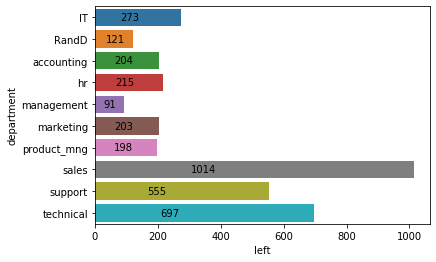

In [229]:
## Department-wise, count of employees who left
import seaborn as sns

dept_wise = df.groupby('department').sum()
dept_wise.reset_index(inplace=True)
bplot = sns.barplot(y='department', x='left', data=dept_wise, orient='h', )

## Adding annotation to the bars
for p in bplot.patches:
        count = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width()*0.3
        y = p.get_y() + p.get_height()/1.5
        bplot.annotate(count, (x, y))

#### Observation from above plot

1. Most number of employee to leave the company are mostly from sales, support or technical department, sales being at top. 
2. Though we can't conclude about the department with higher percentage of employee leaving the company from above graph as sale have high numbers of employee the number of employee to leave the company is also higher. 
3. Managment is with lowest number of employee leaving the company, reason can be good salary and post. 
4. To understand the percentage of employee for different department we can make a plot with percentage rather the count of the employees. 

In [ ]:
employee_count = pd.DataFrame(df['department'].value_counts())
employee_count.reset_index(inplace=True)
employee_count.columns = ['department', 'total']

In [230]:
dept_wise_p = pd.merge(dept_wise, employee_count, on='department')
dept_wise_p['percentage'] = dept_wise_p['left']/dept_wise_p['total']
dept_wise_p.head()

,department,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,total,percentage
0,IT,4683,248119,4256,164,273,3,758.17283,879.452250,1227,0.222494
1,RandD,3033,158030,2650,134,121,27,487.80000,560.446125,787,0.153748
2,accounting,2934,154292,2702,96,204,14,446.68283,550.706125,767,0.265971
3,hr,2701,146828,2480,89,215,15,442.53566,524.006125,739,0.290934
4,management,2432,126787,2711,103,91,69,391.76566,456.234499,630,0.144444


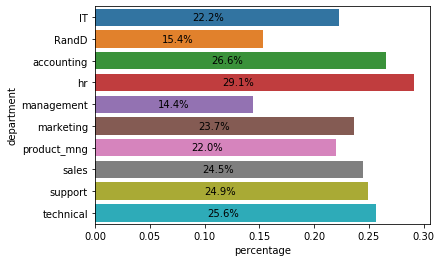

In [235]:
## Ploting the bar graph, percentage of employee 
## from different department who leaves the company.
bplot_p = sns.barplot(x='percentage', y='department', data=dept_wise_p)

for p in bplot_p.patches:
    per = '{:.1f}%'.format(100 * p.get_width())
    x = p.get_x() + p.get_width() * 0.4
    y = p.get_y() + p.get_height()/1.5
    bplot_p.annotate(per, (x,y))

#### Observation from above plot

1. From above plot we can see that employee from the HR & Accounting department have higher ratio of employee leaving the company. 
2. And it is lowest for Management and RandD department. 

In [133]:
## Creating dummy variables for categorical variable, drop_first = true to avoid dummy variable trap
df = pd.get_dummies(data=df, columns=categorical_variables, drop_first=True)
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [57]:
## Creating explanatory and response variables
X = df.drop(columns=['left']).values
y = df.left.values

In [74]:
## Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [75]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [99]:
## Creating a model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print('Accuracy Score: {0:.3f}%'.format(accuracy_score(y_pred, y_test)))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.985%
Confusion Matrix:
[[2290   35]
 [   9  666]]


C:\Users\ajami\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
